In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy as np
from cmaps import *
import matplotlib.ticker as mticker 
from spin_ring_api import * 

In [10]:
r_label = 'r_\mathrm{trunc}'

In [11]:
l = 18
deltas = [2, 3, 4, 5, 6]

lowest_evals = {}
for delta in deltas: 
	truncs = np.arange(2, int(l / 2))
	zero_temp_evals = []
	for trunc in truncs:
		evals, evecs = get_eigen(False, l, delta, 0, trunc)
		zero_temp_evals.append(evals[0])
	lowest_evals[delta] = zero_temp_evals

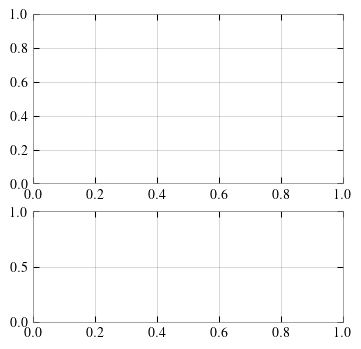

In [12]:
fig, ax = plt.subplots(figsize=(4, 4), nrows=2, gridspec_kw={'height_ratios': [2, 1.3]})

cmap = get_continuous_cmap([
	'#632a70',
	'#534699', 
	'#3b739c',
	'#21908d',
	'#35b779',
	'#94cf55',
	'#eddd47'
	]).resampled(len(deltas))
norm = mpl.colors.Normalize(vmax=deltas[-1], vmin=deltas[0])

In [13]:
factors = {
	1: 1,
	2: 2, 
	3: 3, 
	4: 4,
	5: 5, 
	6: 6, 
}

for delta in lowest_evals.keys():
	r = np.linspace(truncs[0], truncs[-1], 100)
	ax[0].plot(r, factors[delta] / np.power(r, 2 * delta), color='grey', 
        	linestyle='dashed', alpha=0.5)
	ax[0].scatter(np.flip(truncs), lowest_evals[delta], label=delta, alpha=0.8,
	    	color=cmap(norm(delta)))

# ax.legend()
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xticks(truncs)
# Do not use scientific notation for x axis
ax[0].xaxis.set_major_formatter(mticker.ScalarFormatter())

In [14]:
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), location='right', 
		    ticks=deltas, ax=ax.ravel().tolist(), aspect=20, shrink=0.6)
cbar.set_label('$\delta$')
cbar.ax.tick_params(size=0)


In [15]:
ax[1].clear()
for delta in lowest_evals.keys():
	ax[1].plot(np.flip(truncs), lowest_evals[delta] * np.power(np.flip(truncs), 2 * delta), label=delta, alpha=0.8,
	    	color=cmap(norm(delta)))
ax[1].set_yscale('log')
ax[1].set_xticks(truncs)
ax[1].set_ylim(0.3, 50)

(0.3, 50)

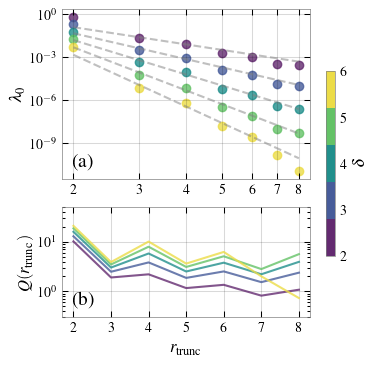

In [16]:
# Plot labels
ax[1].set_xlabel(f'${r_label}$')

ax[0].set_ylabel("$\lambda_0$")
ax[1].set_ylabel(f'$Q({r_label})$')

ax[0].text(0.04, 0.15, '(a)', transform=ax[0].transAxes,
		fontsize=14, va='top')
ax[1].text(0.04, 0.23, '(b)', transform=ax[1].transAxes,
		fontsize=14, va='top')

fig

In [17]:
# fig.tight_layout()
fig.savefig('../drafts/spin_rings_truncations_v0.pdf')
fig.savefig('../drafts/spin_rings_truncations_v0.png')
fig.get_size_inches() * fig.dpi

array([400., 400.])